In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("depression_anxiety_data.csv")
df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

In [4]:
# check for duplicates
duplicate_count = df.duplicated().sum()

missing_values, duplicate_count

(id                      0
 school_year             0
 age                     0
 gender                  0
 bmi                     0
 who_bmi                 0
 phq_score               0
 depression_severity     4
 depressiveness          3
 suicidal                1
 depression_diagnosis    1
 depression_treatment    4
 gad_score               0
 anxiety_severity        0
 anxiousness             6
 anxiety_diagnosis       4
 anxiety_treatment       2
 epworth_score           8
 sleepiness              8
 dtype: int64,
 0)

In [5]:
# Drop any completely empty rows if they exist (unlikely but good to check)
df.dropna(how="all", inplace=True)

In [30]:
# Fill missing categorical values with "Unknown" (or appropriate imputation strategy)
categorical_cols = ["depression_severity", "depressiveness", "depression_diagnosis",
                   "depression_treatment", "anxiousness", "anxiety_diagnosis",
                   "anxiety_treatment", "sleepiness"]

for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)

# Fill missing numerical values with median values
numerical_cols = ["epworth_score"]
for col in numerical_cols:
    df[col].fillna(df[col].median, inplace=True)

# Convert True/False columns to 1/0 for analysis
binary_cols = ["depression_severity", "depressiveness", "depression_diagnosis",
                   "depression_treatment", "anxiousness", "anxiety_diagnosis",
                   "anxiety_treatment", "sleepiness"]
binary_cols = df[binary_cols].replace({"True": 1, "False": 0, "Unknown": -1})

# Verify cleaning results
cleaned_missing_values = df.isnull().sum()

duplicate_count, 

C:\Users\user\AppData\Local\Temp\ipykernel_8012\3986507888.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.median of 0       7.0
1      14.0
2       6.0
3      11.0
4       3.0
       ... 
778     3.0
779     3.0
780     4.0
781    15.0
782     0.0
Name: epworth_score, Length: 770, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(df[col].median, inplace=True)


(0,)

In [7]:
cleaned_missing_values

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                1
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   783 non-null    object 
 8   depressiveness        783 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  783 non-null    object 
 11  depression_treatment  783 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           783 non-null    object 
 15  anxiety_diagnosis     7

In [9]:
# Fill missing value in "suicidal" with "Unknown" and convert it to numeric
df["suicidal"].fillna("Unknown", inplace=True)
df['suicidal'] = df['suicidal'].replace({"True": 1, "False": 0, "Unknown": -1})

In [10]:
# Identify numerical columns for outlier detection
numerical_features = ["age", "bmi", "phq_score", "gad_score", "epworth_score"]

for col in numerical_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert to float, set errors to NaN if non-numeric

In [11]:
# Detect Outliers Using IQR Method
outlier_info = {}
for col in numerical_features:
    if col in df.columns:  # Ensure the column exists
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        outlier_info[col] = {
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outliers Count": len(outliers),
            "Outlier Values": outliers.values[:10]  # Show first 10 outlier values
        }

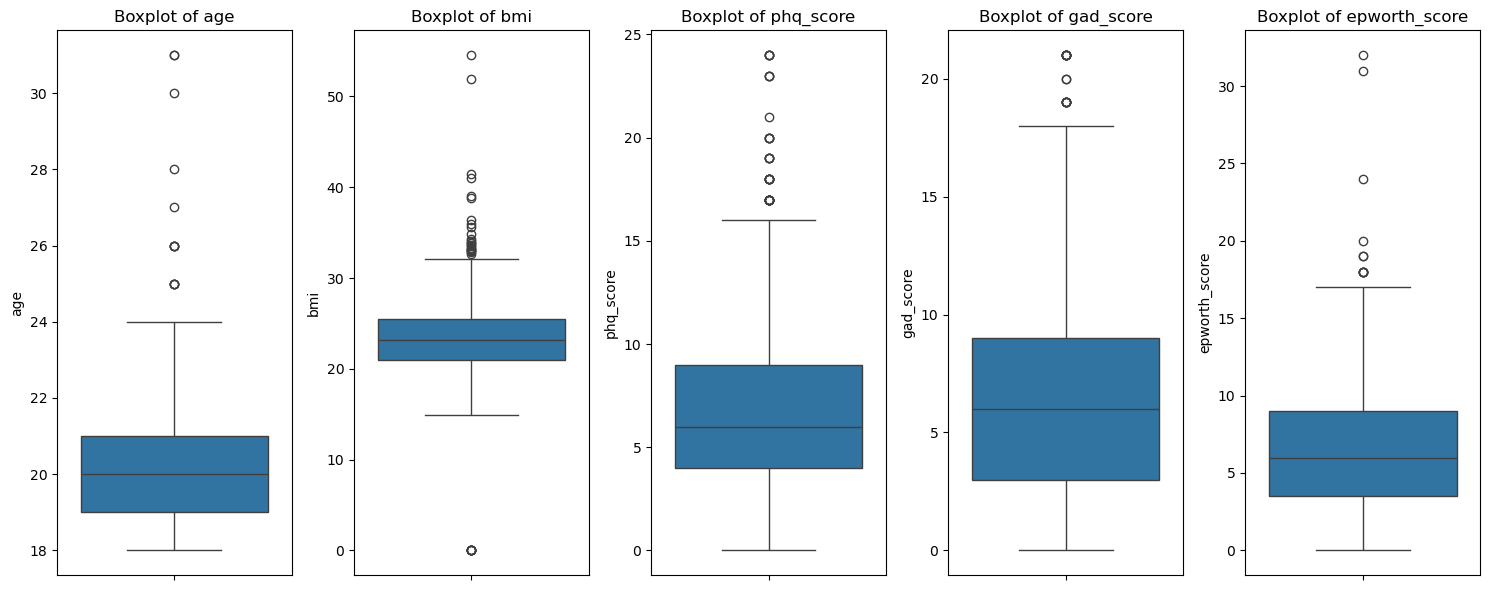

In [12]:
# Boxplot Visualization of Outliers
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_features, 1):
    if col in df.columns:
        plt.subplot(1, len(numerical_features), i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [13]:
# Handling Outliers

In [16]:
# 1. Age: Filtering ages above 24 if needed for specific analysis
df = df[df["age"] <= 24]  

# 2. BMI: Replace 0 values with NaN (assuming 0 is an error)
df.loc[df["bmi"] == 0, "bmi"] = np.nan  

# Fixing Epworth Score capping
df.loc[:, "epworth_score"] = df["epworth_score"].apply(lambda x: min(x, 24) if pd.notna(x) else x)


In [17]:
# Feature Engineering

In [18]:
# Remove invalid BMI values (BMI = 0)
df['mental_health_risk'] = df['phq_score'] + df['gad_score']

In [19]:
# Categorizing PHQ Score (Depression Severity based on standard PHQ-9 guidelines)
def categorize_phq(score):
    if score <= 4:
        return "None - Minimal"
    elif score <= 9:
        return "Mild"
    elif score <= 14:
        return "Moderate"
    elif score <= 19:
        return "Moderately Severe"
    else:
        return "Severe"

df['phq_category'] = df['phq_score'].apply(categorize_phq)

In [20]:
# Categorizing GAD Score (Anxiety Severity based on standard GAD-7 guidelines)
def categorize_gad(score):
    if score <= 4:
        return "None - Minimal"
    elif score <= 9:
        return "Mild"
    elif score <= 14:
        return "Moderate"
    elif score <= 19:
        return "Moderately Severe"
    else:
        return "Severe"

# Apply the function
df['gad_category'] = df['gad_score'].apply(categorize_gad)

In [21]:
# Categorizing BMI into groups
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df["bmi"].apply(categorize_bmi)
df["bmi_category"] = df["bmi_category"].astype("category")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 0 to 782
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    770 non-null    int64   
 1   school_year           770 non-null    int64   
 2   age                   770 non-null    int64   
 3   gender                770 non-null    object  
 4   bmi                   762 non-null    float64 
 5   who_bmi               770 non-null    object  
 6   phq_score             770 non-null    int64   
 7   depression_severity   770 non-null    object  
 8   depressiveness        770 non-null    object  
 9   suicidal              770 non-null    object  
 10  depression_diagnosis  770 non-null    object  
 11  depression_treatment  770 non-null    object  
 12  gad_score             770 non-null    int64   
 13  anxiety_severity      770 non-null    object  
 14  anxiousness           770 non-null    object  
 15  anxiety_dia

In [23]:
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,...,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,mental_health_risk,phq_category,gad_category,bmi_category
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,...,Moderate,True,False,False,7.0,False,20,Mild,Moderate,Obese
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,...,Mild,False,False,False,14.0,True,13,Mild,Mild,Normal
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,...,Mild,False,False,False,6.0,False,14,Mild,Mild,Overweight
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,...,Severe,True,False,False,11.0,True,34,Moderately Severe,Moderately Severe,Normal
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,...,Moderate,True,False,False,3.0,False,20,Mild,Moderate,Overweight


In [24]:
# Statistical Comparisons

In [25]:
from scipy.stats import ttest_ind, f_oneway

# T-Test: Compare PHQ Scores between Male & Female
t_phq_gender, p_phq_gender = ttest_ind(df[df['gender'] == 0]["phq_score"], df[df["gender"] == 1]["phq_score"]) 

# T-test: Compare GAD Scores between Male & Female
t_gad_gender, p_gad_gender = ttest_ind(df[df["gender"] == 0]["gad_score"], df[df["gender"] == 1]["gad_score"]) 

# ANOVA: Compare PHQ Scores across BMI Categories
anova_phq_bmi = f_oneway(df[df["bmi_category"] == "Underweight"]["phq_score"],
                         df[df["bmi_category"] == "Normal"]["phq_score"],
                         df[df["bmi_category"] == "Overwiright"]["phq_score"],
                         df[df["bmi_category"] == "Obese"]["phq_score"])

# ANOVA: Compare GAD Scores across BMI Categories
anova_gad_bmi = f_oneway(df[df["bmi_category"] == "Underweight"]["gad_score"],
                         df[df["bmi_category"] == "Normal"]["gad_score"],
                         df[df["bmi_category"] == "Overweight"]["gad_score"],
                         df[df["bmi_category"] == "Obese"]["gad_score"])

# Display Results
stats_results = {
    "PHQ Score Gender T-test": {"T-Statistic": t_phq_gender, "P-Value": p_phq_gender},
    "GAD Score Gender T-test": {"T-Statistic": t_gad_gender, "P-Value": p_gad_gender},
    "ANOVA PHQ Score by BMI": {"F-Statistic": anova_phq_bmi.statistic, "P-Value": anova_phq_bmi.pvalue},
    "ANOVA GAD Score by BMI": {"F-Statistic": anova_gad_bmi.statistic, "P-Value": anova_gad_bmi.pvalue}
}


stats_results


C:\Users\user\anaconda3\anaconda-3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


{'PHQ Score Gender T-test': {'T-Statistic': nan, 'P-Value': nan},
 'GAD Score Gender T-test': {'T-Statistic': nan, 'P-Value': nan},
 'ANOVA PHQ Score by BMI': {'F-Statistic': nan, 'P-Value': nan},
 'ANOVA GAD Score by BMI': {'F-Statistic': 2.6921786187098706,
  'P-Value': 0.04520255651665254}}

In [26]:
from scipy.stats import ttest_ind, f_oneway

# Step 1: Statistical Comparisons

# T-test: Compare PHQ Scores between Male & Female
t_phq_gender, p_phq_gender = ttest_ind(df[df["gender"] == 0]["phq_score"], df[df["gender"] == 1]["phq_score"])

# T-test: Compare GAD Scores between Male & Female
t_gad_gender, p_gad_gender = ttest_ind(df[df["gender"] == 0]["gad_score"], df[df["gender"] == 1]["gad_score"])

# ANOVA: Compare PHQ Scores across BMI Categories
anova_phq_bmi = f_oneway(df[df["bmi_category"] == "Underweight"]["phq_score"],
                         df[df["bmi_category"] == "Normal"]["phq_score"],
                         df[df["bmi_category"] == "Overweight"]["phq_score"],
                         df[df["bmi_category"] == "Obese"]["phq_score"])

# ANOVA: Compare GAD Scores across BMI Categories
anova_gad_bmi = f_oneway(df[df["bmi_category"] == "Underweight"]["gad_score"],
                         df[df["bmi_category"] == "Normal"]["gad_score"],
                         df[df["bmi_category"] == "Overweight"]["gad_score"],
                         df[df["bmi_category"] == "Obese"]["gad_score"])

# Step 2: Display Results
stats_results = {
    "PHQ Score Gender T-test": {"T-Statistic": t_phq_gender, "P-Value": p_phq_gender},
    "GAD Score Gender T-test": {"T-Statistic": t_gad_gender, "P-Value": p_gad_gender},
    "ANOVA PHQ Score by BMI": {"F-Statistic": anova_phq_bmi.statistic, "P-Value": anova_phq_bmi.pvalue},
    "ANOVA GAD Score by BMI": {"F-Statistic": anova_gad_bmi.statistic, "P-Value": anova_gad_bmi.pvalue},
}

stats_results


{'PHQ Score Gender T-test': {'T-Statistic': nan, 'P-Value': nan},
 'GAD Score Gender T-test': {'T-Statistic': nan, 'P-Value': nan},
 'ANOVA PHQ Score by BMI': {'F-Statistic': 3.4304528054551984,
  'P-Value': 0.016712735146927404},
 'ANOVA GAD Score by BMI': {'F-Statistic': 2.6921786187098706,
  'P-Value': 0.04520255651665254}}

In [31]:

label_encoders = {}
# binary_cols = ["mental_health_history", "therapy", "medication"]  # Add any other binary columns

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert Yes/No to 1/0
    label_encoders[col] = le  # Store encoder if needed later

df = pd.get_dummies(df, columns=["gender", "stress_level", "exercise_frequency", "social_support"], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# # Step 1: Prepare Data for Modeling
df["severe_mental_health"] = (df["mental_health_risk"] >= 20).astype(int)  # Define "Severe" risk as PHQ + GAD ≥ 20

# Select Features & Target
features = ["gender", "bmi", "epworth_score", "phq_score", "gad_score"]
X = df[features]
y = df["severe_mental_health"]

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 3: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['bool', 'str']